In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

#machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

#data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#others
from functools import reduce
import pickle
from IPython.display import Image
import warnings

# Data Loading

In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t') #read csv

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Exploratory Analysis

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# show the amount of null data in the dataframe
def show_null(df): 
    null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending = False).index
    
    null_data = pd.concat(
        [
            df.isnull().sum(axis=0),
            (df.isnull().sum(axis=0)/len(df)).sort_values(ascending = False),
            df.loc[:, df.columns.isin(list(null_columns))].dtypes
        ],
        axis=1
    )
    
    null_data = null_data.rename(columns= {0: 'quantity', 1: '% null', 2: 'type'}).sort_values(ascending = False, by = '% null')
    
    return null_data

In [7]:
# view numeric data
def plot_num(df, feature):
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(1,2)
    sns.boxplot(y = feature, data = df, color = 'gold', ax = fig.add_subplot(gs[0,0]))
    plt.ylabel(feature)
    sns.stripplot(y = df[feature], color = 'deepskyblue', ax = fig.add_subplot(gs[0,1]))
    plt.ylabel(None)
    plt.show()

In [8]:
# view categorical data
def plot_cat(df, feature):
    fig = plt.figure(figsize=(12,8))
    ax = sns.countplot(data = df, x = feature)
    
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4 , p.get_height() + 5), ha = 'center', color = 'black')
        
    plt.xlabel('\n' + feature)
    plt.ylabel('Number of customers')
    plt.show()

In [9]:
show_null(df) # informations about null datas in df

,quantity,% null,type
Income,24,0.010714,float64
ID,0,0.000000,int64
NumDealsPurchases,0,0.000000,int64
Z_Revenue,0,0.000000,int64
Z_CostContact,0,0.000000,int64
Complain,0,0.000000,int64
AcceptedCmp2,0,0.000000,int64
AcceptedCmp1,0,0.000000,int64
AcceptedCmp5,0,0.000000,int64
AcceptedCmp4,0,0.000000,int64


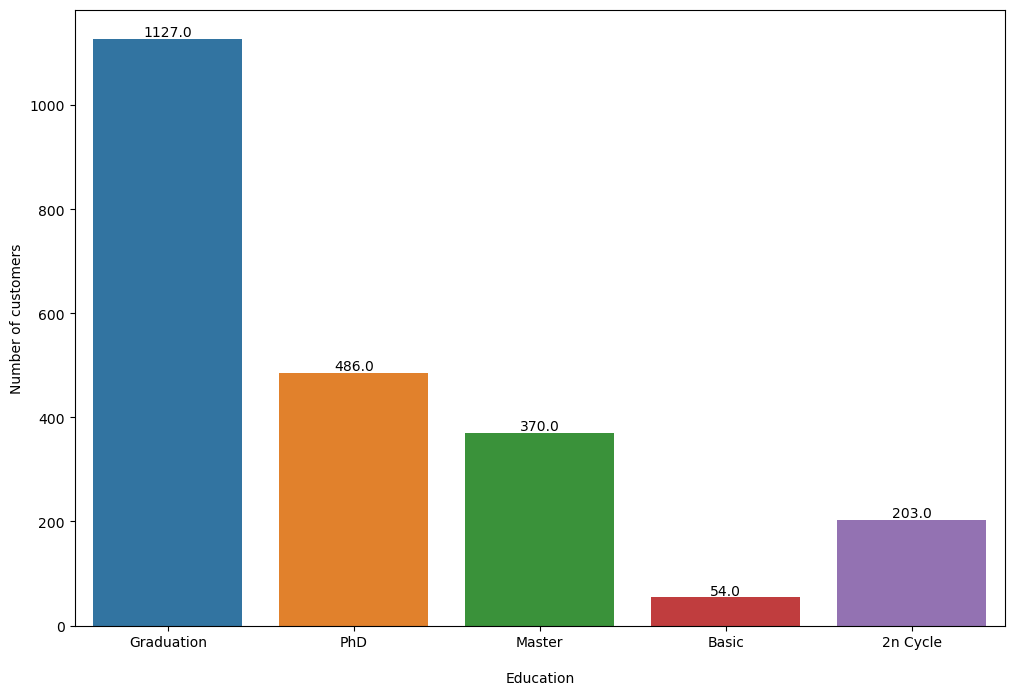

In [10]:
plot_cat(df, 'Education') # graph about clients' academic background

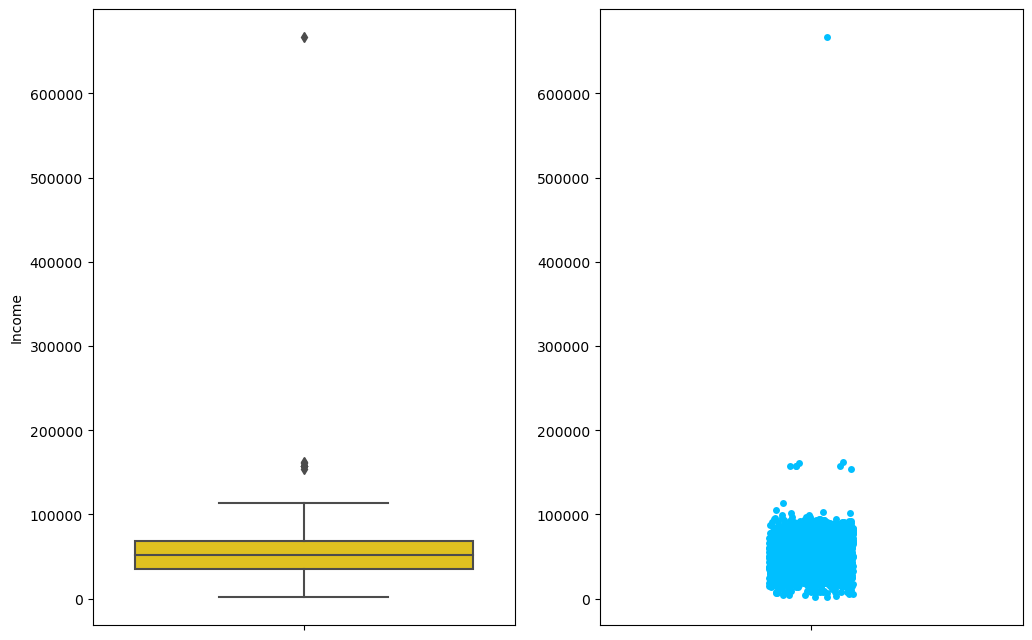

In [11]:
plot_num(df, 'Income') # graphs about customer income

## People

In [12]:
people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]

In [13]:
people.dtypes

ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer        object
Recency             int64
Complain            int64
dtype: object

In [14]:
people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst=True) # Dt_Customer is a date, type conversion is required in this case

C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\3519096935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst=True) # Dt_Customer is a date, type conversion is required in this case


In [15]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0


In [16]:
show_null(people)

,quantity,% null,type
Income,24,0.010714,float64
ID,0,0.000000,int64
Year_Birth,0,0.000000,int64
Education,0,0.000000,object
Marital_Status,0,0.000000,object
Kidhome,0,0.000000,int64
Teenhome,0,0.000000,int64
Dt_Customer,0,0.000000,datetime64[ns]
Recency,0,0.000000,int64
Complain,0,0.000000,int64


### Income

In [17]:
people.dropna(inplace = True)

C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\2701864366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people.dropna(inplace = True)


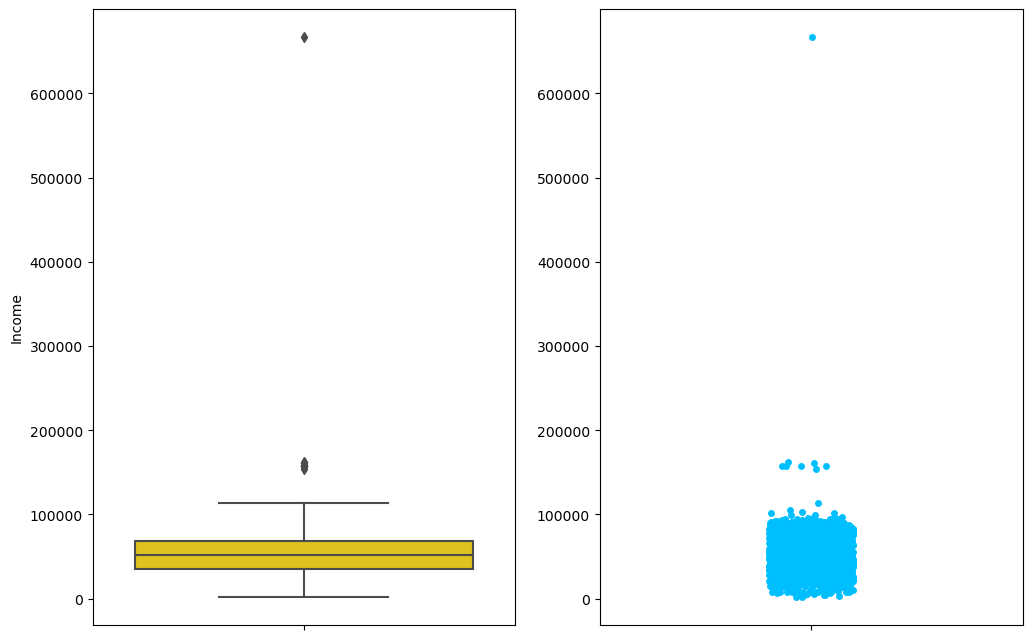

In [18]:
plot_num(people, 'Income')

In [19]:
people = people[people.Income < 200000] # Removing Outliers

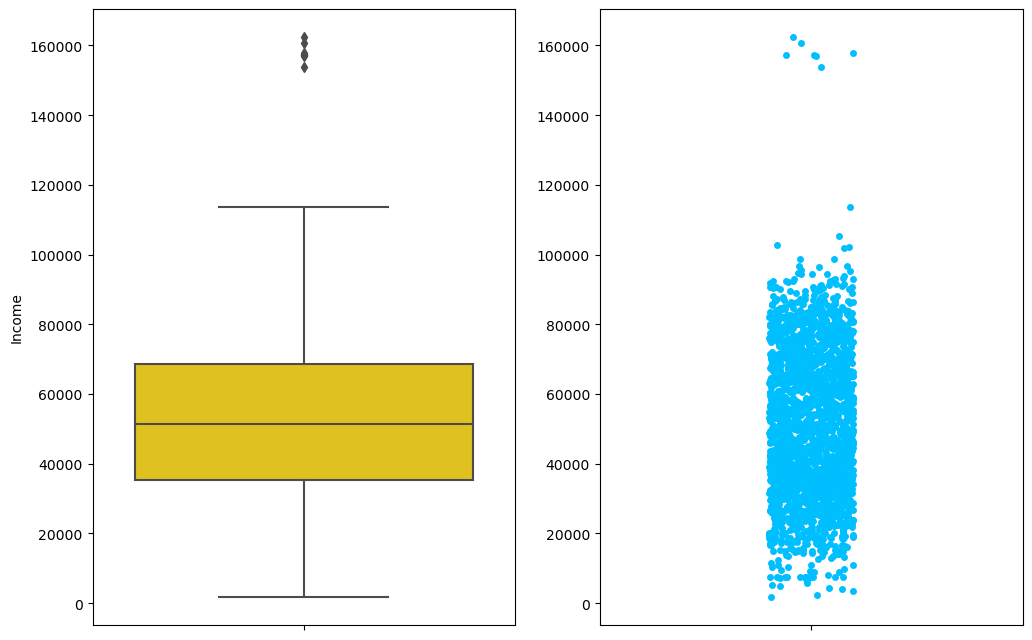

In [20]:
plot_num(people, 'Income')

### Year Birth

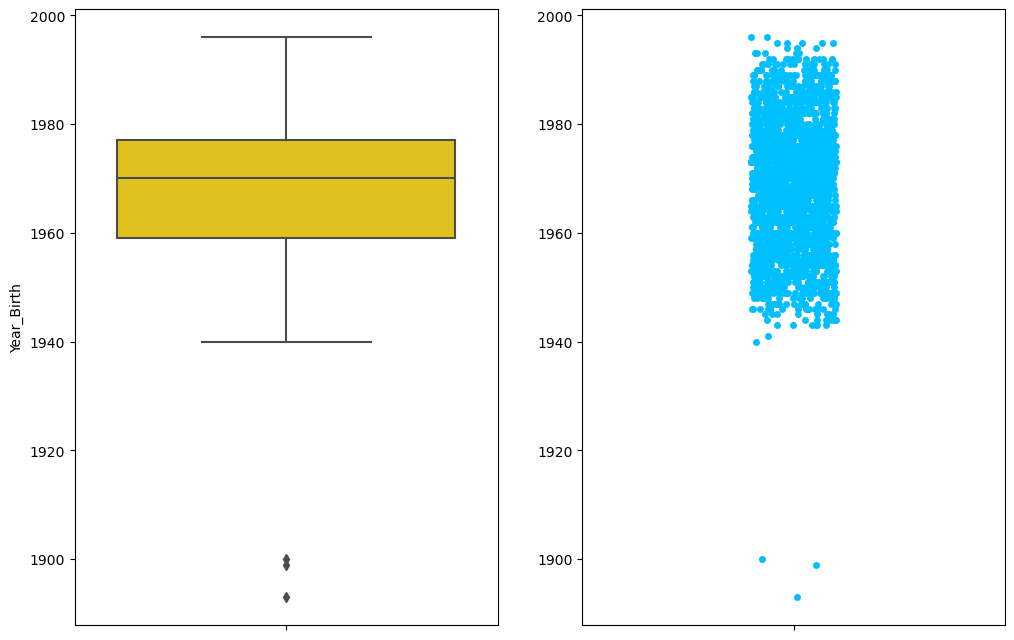

In [21]:
plot_num(people, 'Year_Birth')

In [22]:
people = people[people.Year_Birth > 1930] # Removing Incorrect Information

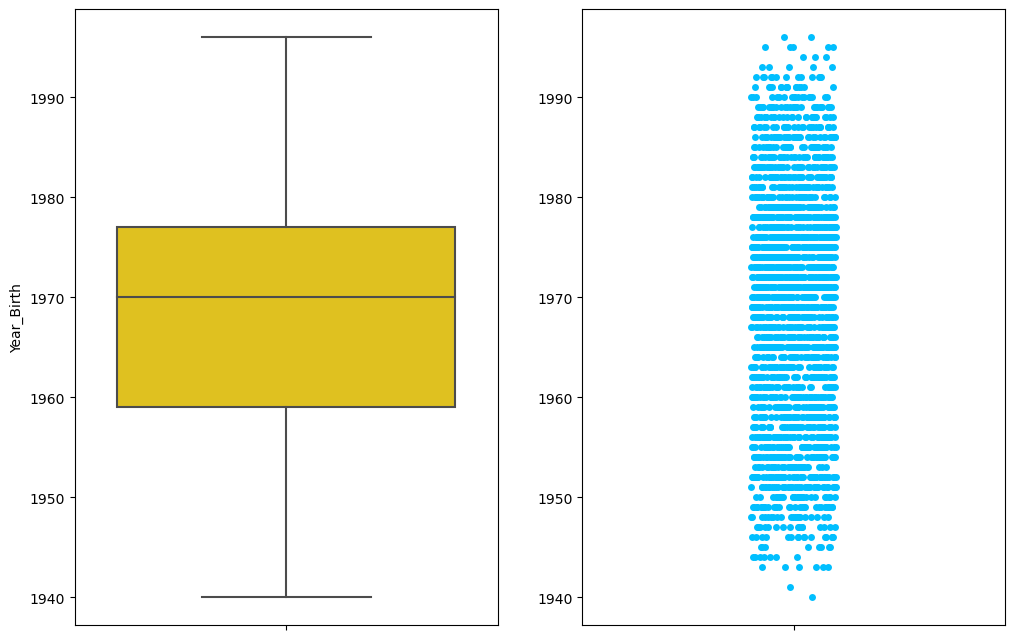

In [23]:
plot_num(people, 'Year_Birth')

### Education

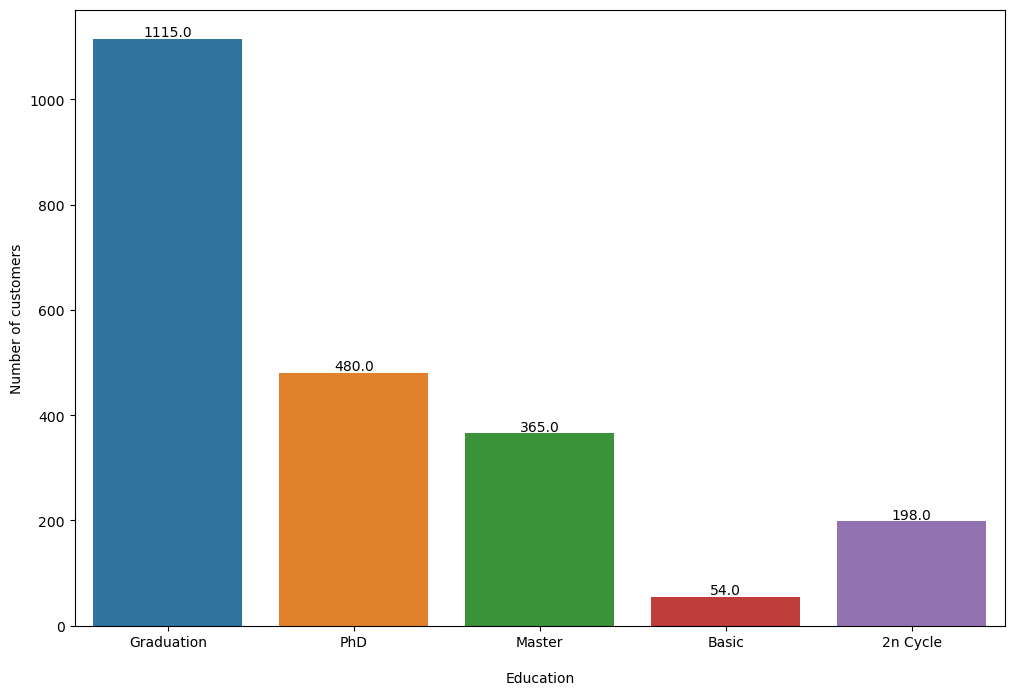

In [24]:
plot_cat(people, 'Education')

In [25]:
people.Education = people.Education.apply(lambda x: 
                       0 if x == 'Basic'
                       else(1 if x == '2n Cycle'
                       else(2 if x == 'Graduation'
                       else(3 if x == 'Master'
                       else(4 if x == 'PhD' else None
                      )))))

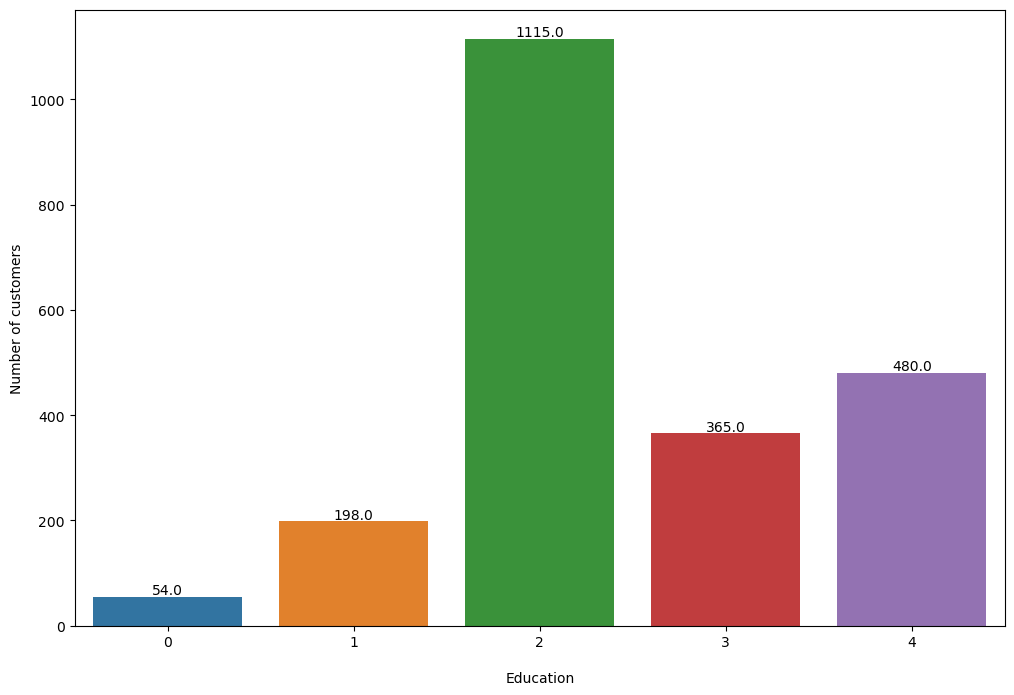

In [26]:
plot_cat(people, 'Education') # Education is an ordinal data, it is necessary to put it in order

### Marital Status

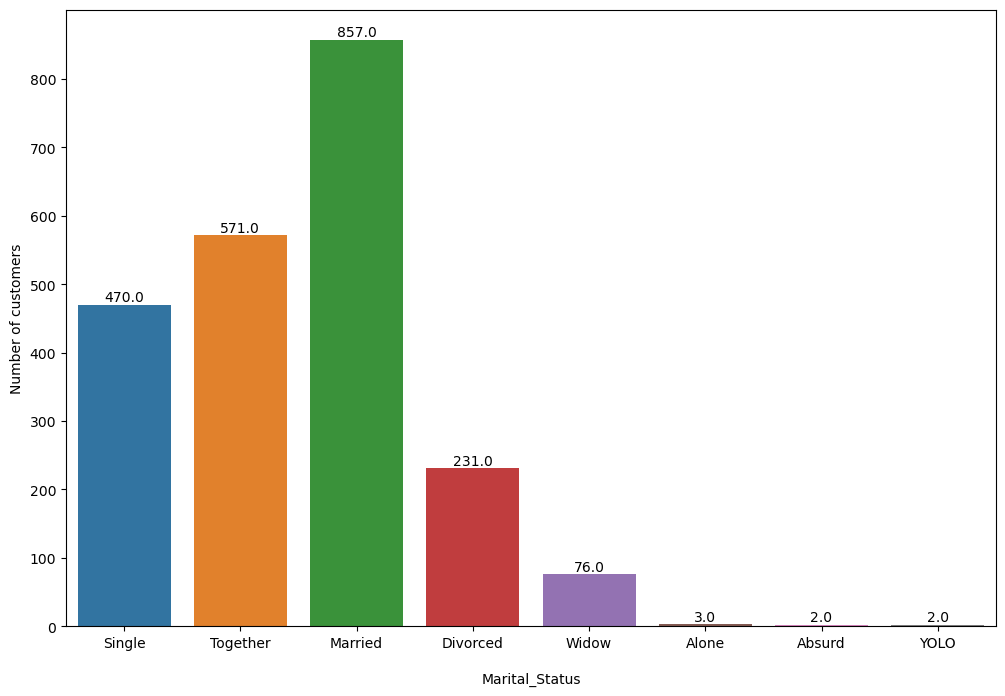

In [27]:
plot_cat(people, 'Marital_Status')

In [28]:
people = people[people.Marital_Status != 'Absurd']

In [29]:
people.Marital_Status = people.Marital_Status.apply(lambda x: 
                       'Single' if x == 'Alone'
                        else('Single' if x == 'YOLO'
                        else('Together' if x == 'Married' else x
                        )))
                        # together and married in the same category; YOLO and alone in the same category; Absurd discarded                           

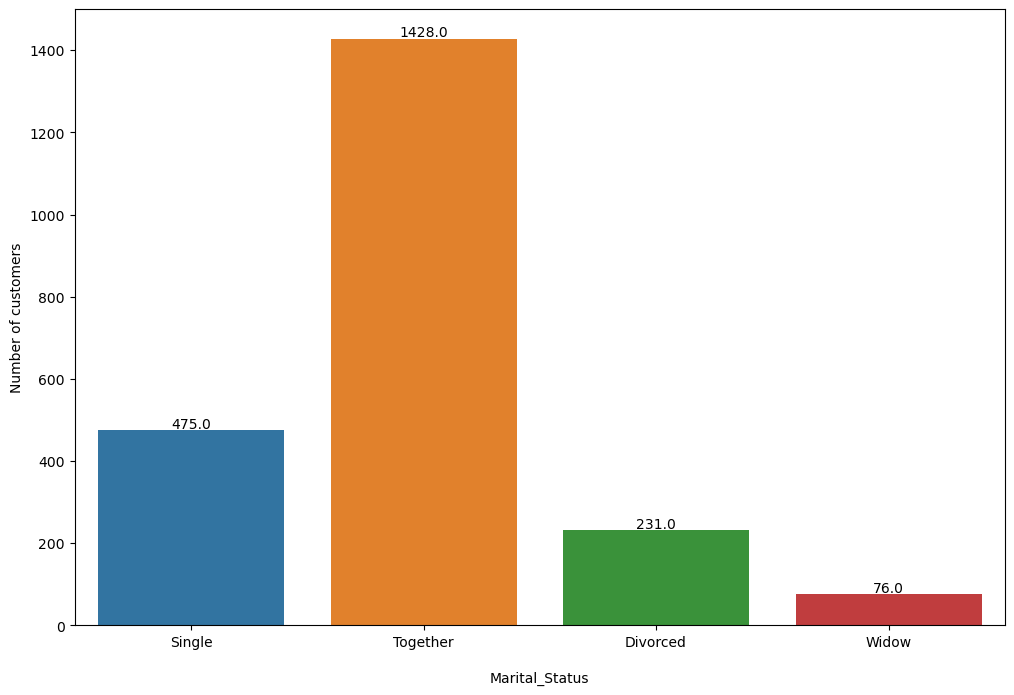

In [30]:
plot_cat(people, 'Marital_Status') # Marital Status is nominal data, it is necessary create new columns with 0 or 1 if corresp with status

In [31]:
people.dtypes

ID                         int64
Year_Birth                 int64
Education                  int64
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Dt_Customer       datetime64[ns]
Recency                    int64
Complain                   int64
dtype: object

In [32]:
people = pd.get_dummies(people, dtype=int)

In [33]:
people.dtypes

ID                                  int64
Year_Birth                          int64
Education                           int64
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
Complain                            int64
Marital_Status_Divorced             int32
Marital_Status_Single               int32
Marital_Status_Together             int32
Marital_Status_Widow                int32
dtype: object

In [34]:
people

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,2,58138.0,0,0,2012-09-04,58,0,0,1,0,0
1,2174,1954,2,46344.0,1,1,2014-03-08,38,0,0,1,0,0
2,4141,1965,2,71613.0,0,0,2013-08-21,26,0,0,0,1,0
3,6182,1984,2,26646.0,1,0,2014-02-10,26,0,0,0,1,0
4,5324,1981,4,58293.0,1,0,2014-01-19,94,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,2013-06-13,46,0,0,0,1,0
2236,4001,1946,4,64014.0,2,1,2014-06-10,56,0,0,0,1,0
2237,7270,1981,2,56981.0,0,0,2014-01-25,91,0,1,0,0,0
2238,8235,1956,3,69245.0,0,1,2014-01-24,8,0,0,0,1,0


### Children Home

In [35]:
people['ChildrenHome'] = people.Kidhome + people.Teenhome # children in a single category

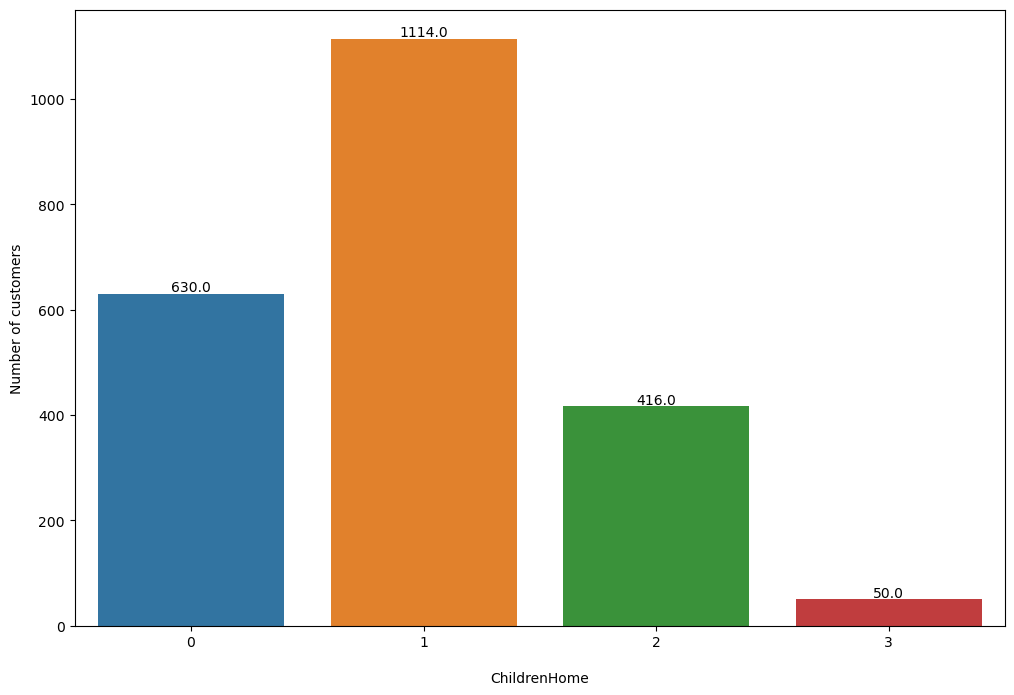

In [36]:
plot_cat(people, 'ChildrenHome')

In [37]:
people.drop(columns = ['Kidhome', 'Teenhome'], inplace=True)

### Dt Customer

In [38]:
(people['Dt_Customer'] + pd.to_timedelta(people['Recency'], unit='d')).max() # the last day of a customer's registration

Timestamp('2014-10-04 00:00:00')

In [39]:
people['LifeTime'] = (pd.to_datetime('2014-10-05') - people['Dt_Customer']).dt.days/30 # customer lifetime on the platform

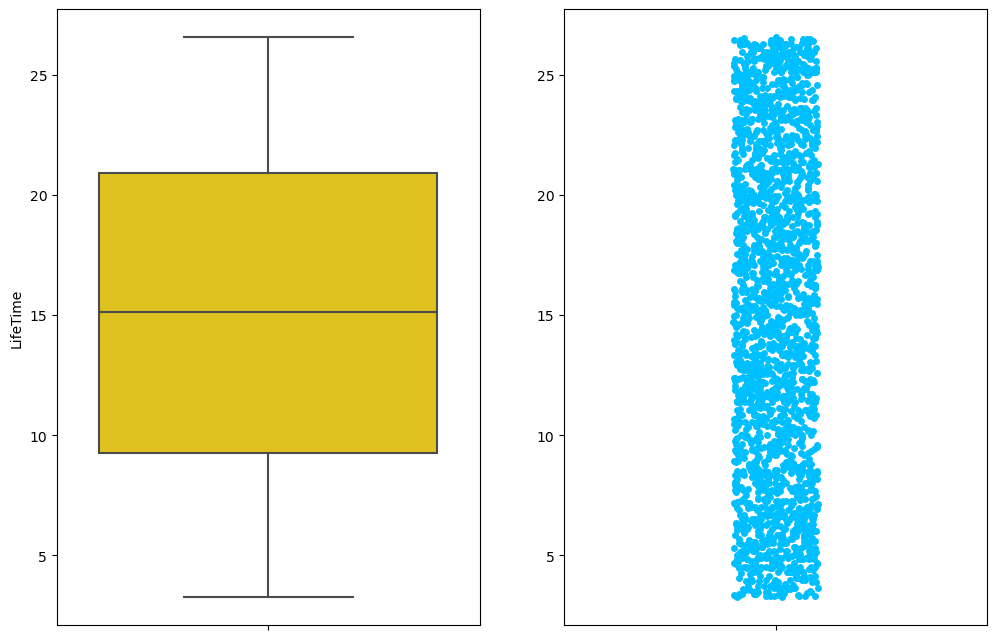

In [40]:
plot_num(people, 'LifeTime') 

### Recency

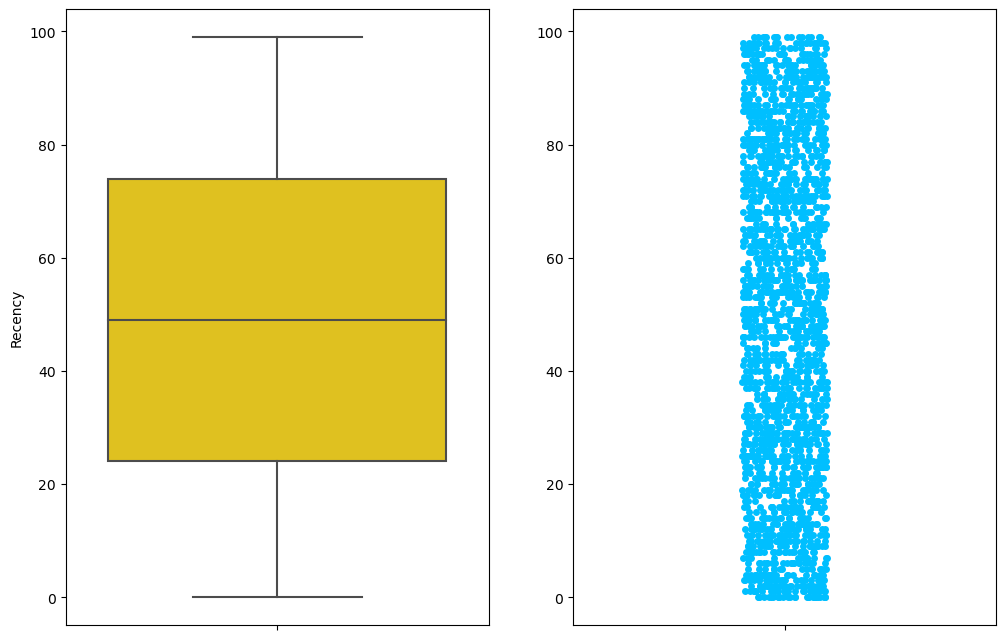

In [41]:
plot_num(people, 'Recency')

### Complain

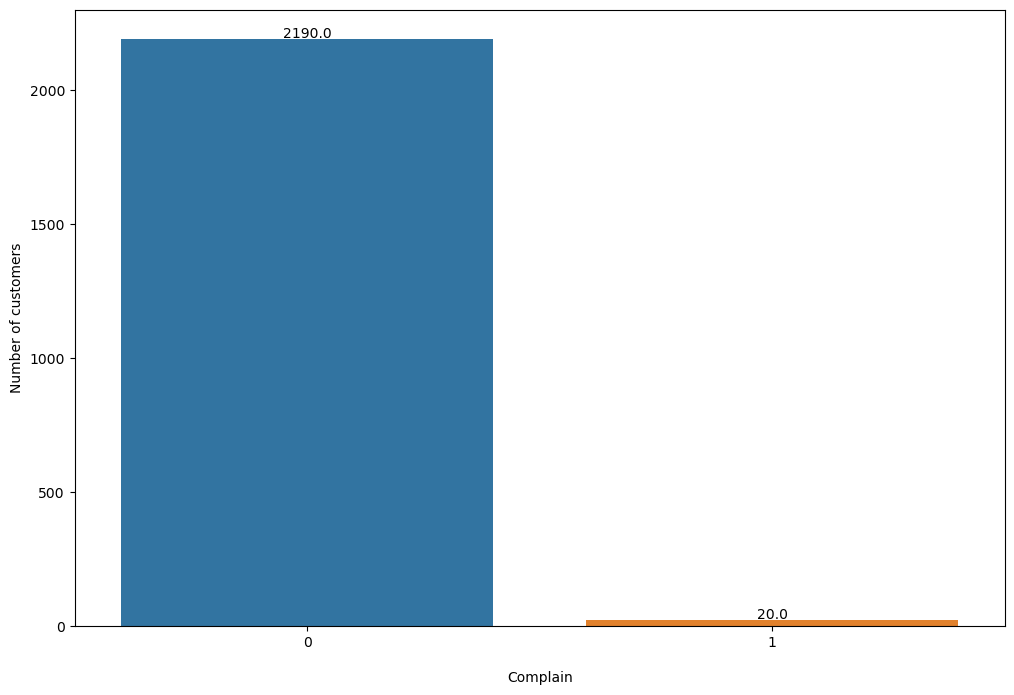

In [42]:
plot_cat(people, 'Complain')

In [43]:
people.drop(columns=['Complain'], inplace=True) # no impact on analysis

In [44]:
people.drop(columns=['Dt_Customer'], inplace=True) # will not be used

## Products

In [45]:
products = df[['ID','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [46]:
products.dtypes

ID                  int64
MntWines            int64
MntFruits           int64
MntMeatProducts     int64
MntFishProducts     int64
MntSweetProducts    int64
MntGoldProds        int64
dtype: object

In [47]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [48]:
show_null(products)

,quantity,% null,type
ID,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64
MntFishProducts,0,0.0,int64
MntSweetProducts,0,0.0,int64
MntGoldProds,0,0.0,int64


### MntWines

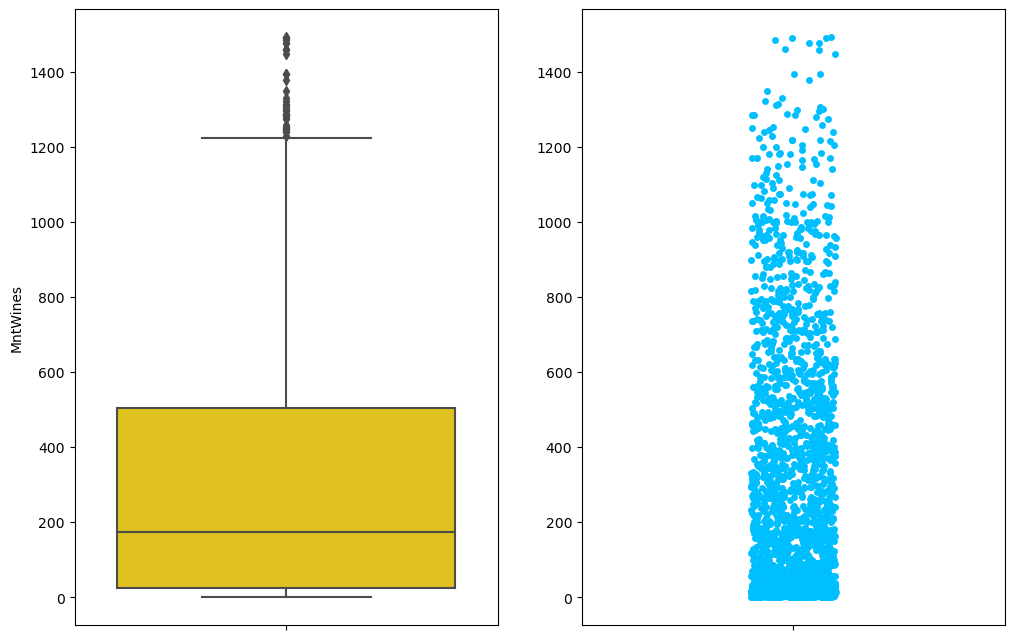

In [49]:
plot_num(products, 'MntWines')

### MntFruits

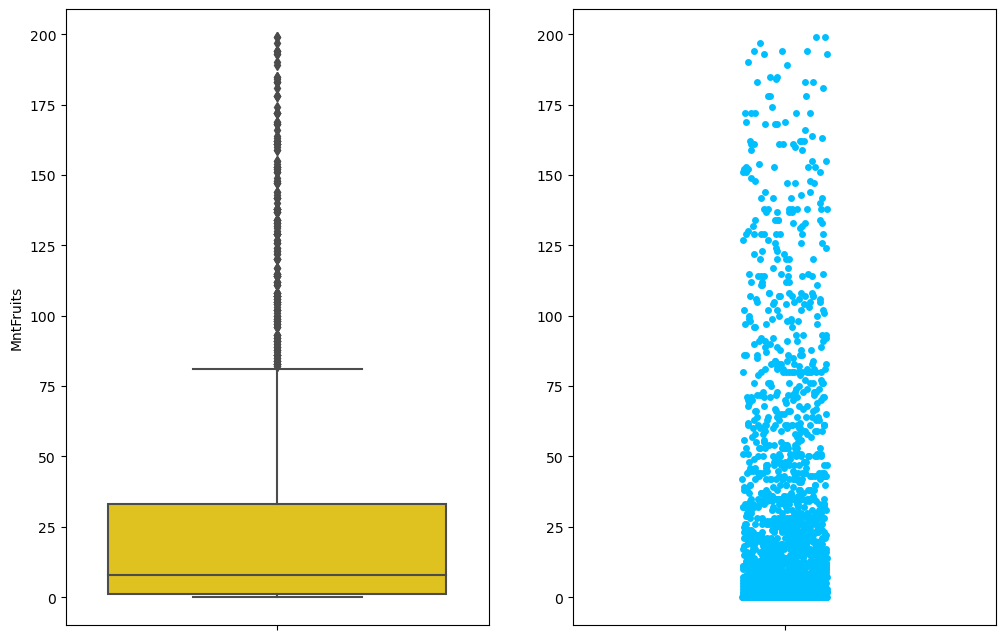

In [50]:
plot_num(products, 'MntFruits')

### MntMeatProducts

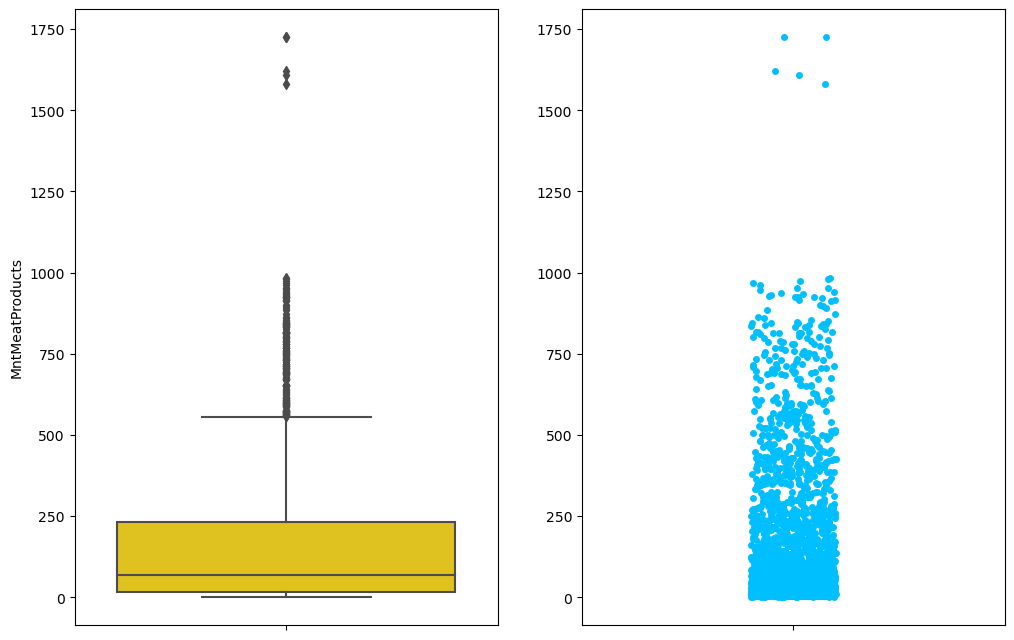

In [51]:
plot_num(products, 'MntMeatProducts')

### MntFishProducts	

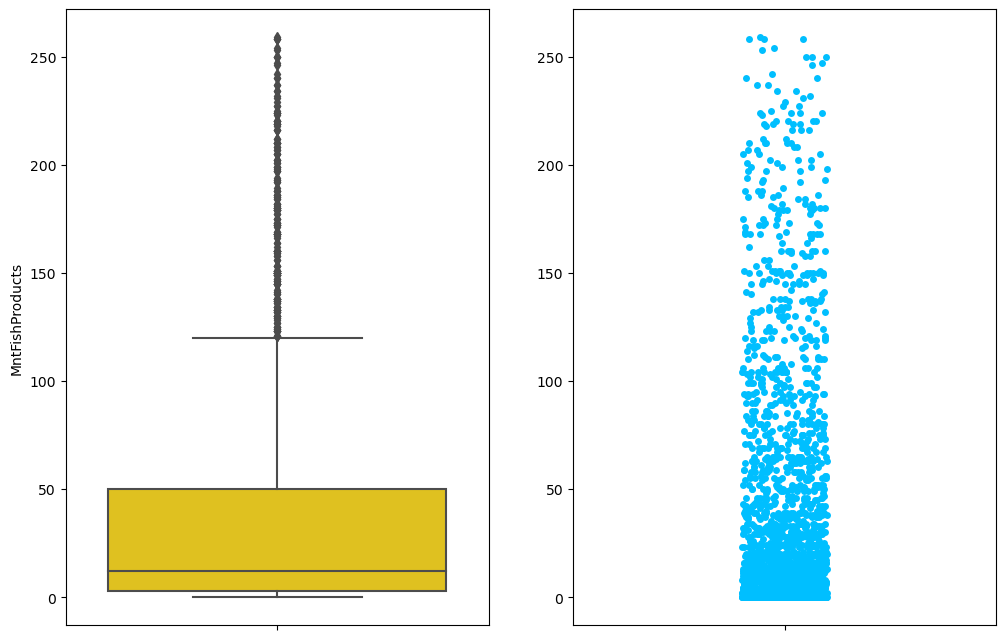

In [52]:
plot_num(products, 'MntFishProducts')

### MntSweetProducts

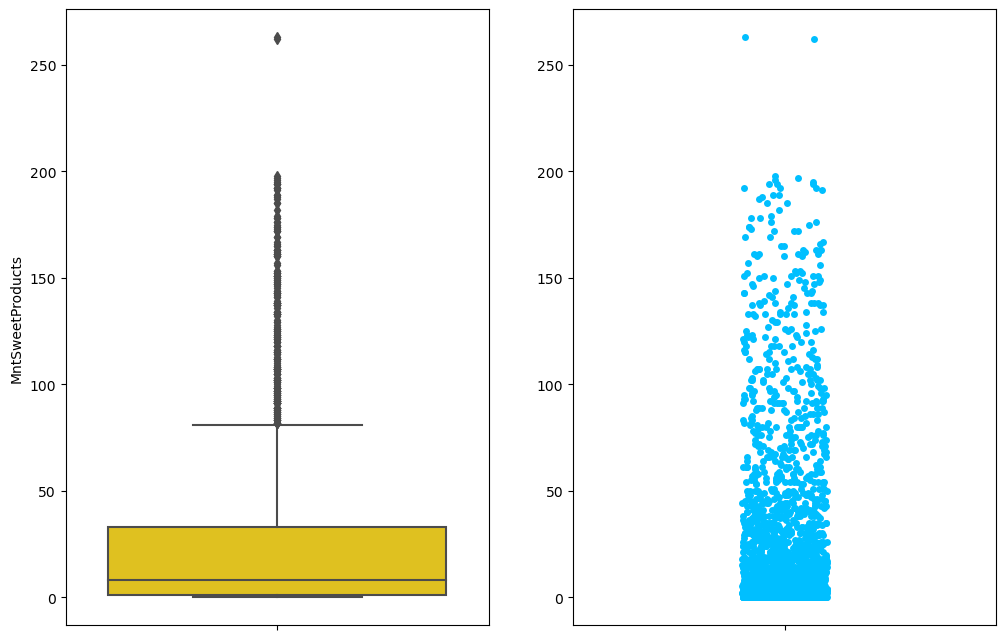

In [53]:
plot_num(products, 'MntSweetProducts')

### MntGoldProds

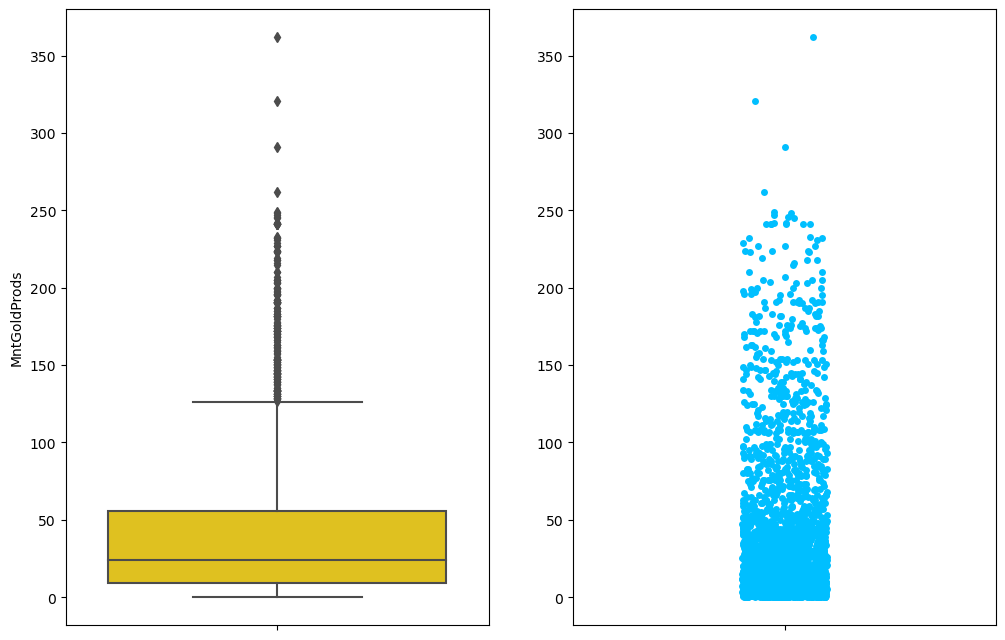

In [54]:
plot_num(products, 'MntGoldProds')

In [55]:
products['AllProducts'] = products.MntFishProducts + products.MntFruits + products.MntGoldProds + products.MntMeatProducts + products.MntSweetProducts + products.MntWines

C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\3058573963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['AllProducts'] = products.MntFishProducts + products.MntFruits + products.MntGoldProds + products.MntMeatProducts + products.MntSweetProducts + products.MntWines


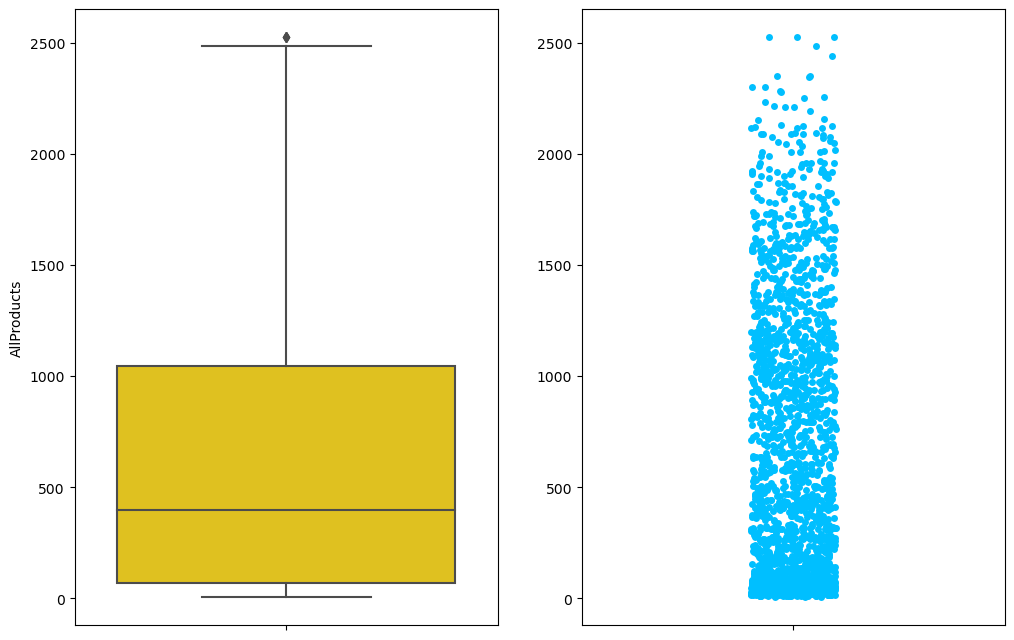

In [56]:
plot_num(products, 'AllProducts') # all products sum

In [57]:
products.MntFishProducts = products.MntFishProducts/products['AllProducts']
products.MntFruits = products.MntFruits/products['AllProducts']
products.MntGoldProds = products.MntGoldProds/products['AllProducts']
products.MntMeatProducts = products.MntMeatProducts/products['AllProducts']
products.MntSweetProducts = products.MntSweetProducts/products['AllProducts']
products.MntWines = products.MntWines/products['AllProducts']

C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\597831210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.MntFishProducts = products.MntFishProducts/products['AllProducts']
C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\597831210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.MntFruits = products.MntFruits/products['AllProducts']
C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\597831210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [58]:
products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllProducts
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196,605.798214
std,3246.662198,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095,68.750000
50%,5458.500000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294,396.000000
75%,8427.750000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768,1045.500000
max,11191.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,2525.000000


In [59]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllProducts
0,5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617
1,2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27
2,4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776
3,6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53
4,5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422


Promotion - 
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place -
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

### Promotion

In [60]:
promotion = df[['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']]

In [61]:
promotion.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,0,0,0,0,0,1
1,2174,0,0,0,0,0,0
2,4141,0,0,0,0,0,0
3,6182,0,0,0,0,0,0
4,5324,0,0,0,0,0,0


In [62]:
show_null(promotion)

,quantity,% null,type
ID,0,0.0,int64
AcceptedCmp1,0,0.0,int64
AcceptedCmp2,0,0.0,int64
AcceptedCmp3,0,0.0,int64
AcceptedCmp4,0,0.0,int64
AcceptedCmp5,0,0.0,int64
Response,0,0.0,int64


In [63]:
promotion.describe()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,3246.662198,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
promotion['AcceptedCmp'] = promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.AcceptedCmp3 + promotion.AcceptedCmp4 + \
promotion.AcceptedCmp5 + promotion.Response

C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\881330676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotion['AcceptedCmp'] = promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.AcceptedCmp3 + promotion.AcceptedCmp4 + \


In [65]:
promotion['AcceptedCmp'].describe() #all accept promotions

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCmp, dtype: float64

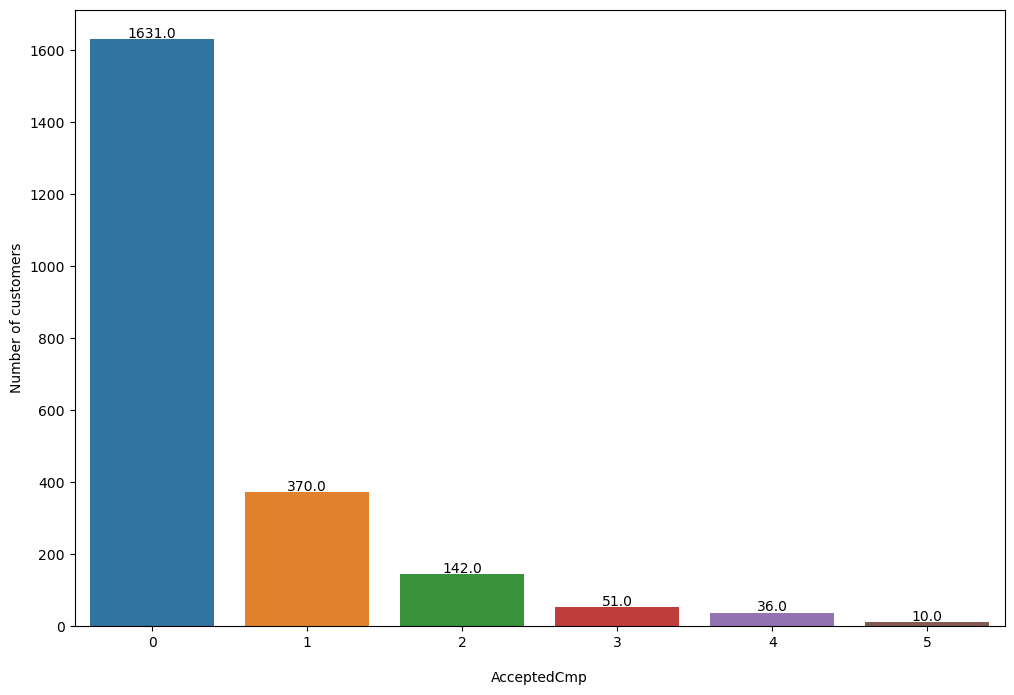

In [66]:
plot_cat(promotion, 'AcceptedCmp')

In [67]:
promotion = promotion[['ID', 'AcceptedCmp']]

### Place

In [68]:
place = df[['ID','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']]

In [69]:
place.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth
0,5524,8,10,4,3,7
1,2174,1,1,2,2,5
2,4141,8,2,10,1,4
3,6182,2,0,4,2,6
4,5324,5,3,6,5,5


In [70]:
show_null(place)

,quantity,% null,type
ID,0,0.0,int64
NumWebPurchases,0,0.0,int64
NumCatalogPurchases,0,0.0,int64
NumStorePurchases,0,0.0,int64
NumDealsPurchases,0,0.0,int64
NumWebVisitsMonth,0,0.0,int64


In [71]:
place['AllPurchases'] = place.NumWebPurchases + place.NumCatalogPurchases + place.NumStorePurchases # total purchase quantity per customer

C:\Users\jenif\AppData\Local\Temp\ipykernel_13644\2225630726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place['AllPurchases'] = place.NumWebPurchases + place.NumCatalogPurchases + place.NumStorePurchases # total purchase quantity per customer


In [72]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,AllPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,2.662054,5.790179,2.325000,5.316518,12.537054
std,3246.662198,2.778714,2.923101,3.250958,1.932238,2.426645,7.205741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000
50%,5458.500000,4.000000,2.000000,5.000000,2.000000,6.000000,12.000000
75%,8427.750000,6.000000,4.000000,8.000000,3.000000,7.000000,18.000000
max,11191.000000,27.000000,28.000000,13.000000,15.000000,20.000000,32.000000


In [73]:
place[place.AllPurchases == 0]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,AllPurchases
655,5555,0,0,0,0,0,0
981,3955,0,0,0,0,14,0
1245,6862,0,0,0,15,20,0
1524,11110,0,0,0,0,14,0
1846,9931,0,0,0,15,19,0
2132,11181,0,0,0,0,0,0


In [74]:
place = place[place['AllPurchases']>0]

In [75]:
place['NumWebPurchases'] = place['NumWebPurchases']/place['AllPurchases']
place['NumCatalogPurchases'] = place['NumCatalogPurchases']/place['AllPurchases']
place['NumStorePurchases'] = place['NumStorePurchases']/place['AllPurchases']
place['NumDealsPurchases'] = place['NumDealsPurchases']/place['AllPurchases']

In [76]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,AllPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5585.427037,0.329874,0.164809,0.505317,0.247963,5.300806,12.570725
std,3245.168172,0.121858,0.140668,0.149485,0.356679,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2817.750000,0.250000,0.000000,0.401852,0.083333,3.000000,6.000000
50%,5453.500000,0.333333,0.150000,0.500000,0.200000,6.000000,12.000000
75%,8419.500000,0.400000,0.250000,0.600000,0.333333,7.000000,18.000000
max,11191.000000,1.000000,1.000000,1.000000,15.000000,20.000000,32.000000


In [77]:
place = place[place['NumDealsPurchases']<=1]

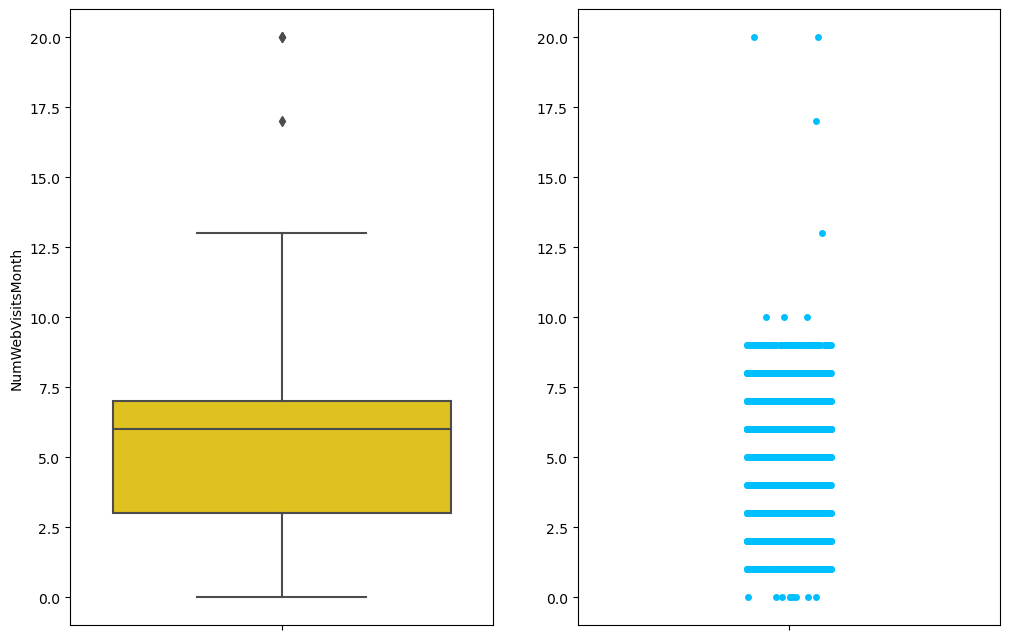

In [78]:
plot_num(place, 'NumWebVisitsMonth')

## Joining data

In [79]:
df_list = [people, products, promotion, place]

In [80]:
final_df = reduce(lambda df1, df2: pd.merge(df1, df2, on='ID'), df_list) # joining all dataframes

In [81]:
final_df.shape

(2203, 25)

In [82]:
final_df.columns 

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'ChildrenHome',
       'LifeTime', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AllProducts',
       'AcceptedCmp', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth',
       'AllPurchases'],
      dtype='object')

In [83]:
final_df.drop(columns=['ID'], inplace=True)

# Normalization

In [86]:
def scaler(df): # 0 - 1 normalization
    df2 = df.copy()
    for column in df2:
        #print(f"Column: {column}, dtype: {df2[column].dtype}")
        val_min = df2[column].min()
        val_max = df2[column].max()
        df2[column] = (df[column] - val_min)/(val_max - val_min)
    return df2 

In [87]:
scaled_df = scaler(final_df)

In [88]:
scaled_df.describe()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime,...,MntSweetProducts,MntGoldProds,AllProducts,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,AllPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.516179,0.615070,0.309517,0.494858,0.103495,0.214707,0.647299,0.034498,0.316689,0.506590,...,0.053607,0.134151,0.238604,0.089877,0.330002,0.164580,0.505419,0.241032,0.265138,0.374255
std,0.208790,0.251205,0.132629,0.292626,0.304674,0.410712,0.477919,0.182547,0.249584,0.289392,...,0.064434,0.121894,0.239412,0.178555,0.120862,0.139301,0.148665,0.172198,0.117599,0.231731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.500000,0.205796,0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.258941,...,0.009126,0.042521,0.024235,0.000000,0.250000,0.000000,0.400000,0.083333,0.150000,0.161290
50%,0.535714,0.500000,0.305883,0.494949,0.000000,0.000000,1.000000,0.000000,0.333333,0.509299,...,0.034950,0.094632,0.154946,0.000000,0.333333,0.150000,0.500000,0.200000,0.300000,0.354839
75%,0.660714,0.750000,0.412801,0.747475,0.000000,0.000000,1.000000,0.000000,0.333333,0.756795,...,0.074329,0.189881,0.413190,0.200000,0.400000,0.250000,0.600000,0.333333,0.350000,0.580645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Elbow Method

In [95]:
inertia = []
clusters = range(1, 15)

for k in clusters:
    Model = KMeans(n_clusters=k)
    Model.fit(scaled_df)
    inertia.append(Model.inertia_)

C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jenif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

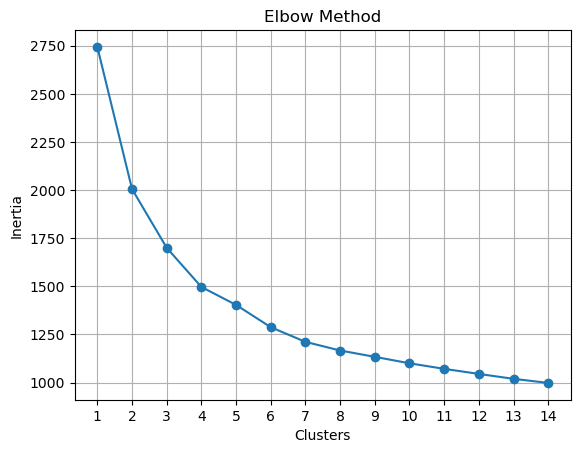

In [97]:
plt.plot(clusters, inertia, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(clusters)
plt.grid(True)
plt.show()

# Weight Allocation